<a href="https://colab.research.google.com/github/sharkawy98/data_analysis/blob/main/summary_statistics_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Books dataset analysis 


**Comprehensive list of all books listed in GoodReads website**


Columns description:
* bookID: Contains the unique ID for each book/series
* title: contains the titles of the books
* authors: contains the author of the particular book
* average_rating: the average rating of the books, as decided by the users
* isbn: ISBN(10) number, a unique number to identify the book, the International Standard Book Number.
* isbn13: The new format for ISBN, 13 digits
* language_code: Tells the language for the books
* num_pages: Contains the number of pages for the book
* ratings_count: Contains the number of ratings given for the book
* text_reviews_count: Has the count of reviews left by users
* publication_date: the date of book publication
* publisher: the name of the publisher
---

## **import libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('seaborn')  # switch to seaborn style

```
#import your dataset 
```

In [ ]:
books = pd.read_csv('/content/drive/MyDrive/datasets/books.csv', error_bad_lines=False)
books.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


## **Find the mean, median, standard deviation**



In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
books.columns = [col.strip() for col in books.columns]  # remove leading and trailing spaces from columns names

In [ ]:
# change dtype of of bookID & isbn13
books.bookID = books.bookID.astype('object')
books.isbn13 = books.isbn13.astype('object')

In [ ]:
descriptive_stats = books.describe().loc[['mean', 'std']].transpose()  # get mean and std of numerical data
descriptive_stats = descriptive_stats.round(2)  # round data to 2 decimal places
descriptive_stats

,mean,std
average_rating,3.93,0.35
num_pages,336.41,241.15
ratings_count,17942.85,112499.15
text_reviews_count,542.05,2576.62


In [ ]:
# add median to descriptive_stats df
medians = []
for attr in descriptive_stats.index:
    medians.append(books[attr].median())
descriptive_stats['median'] = medians

In [ ]:
descriptive_stats  # final result

,mean,std,median
average_rating,3.93,0.35,3.96
num_pages,336.41,241.15,299.00
ratings_count,17942.85,112499.15,745.00
text_reviews_count,542.05,2576.62,47.00



## **Create a normalized form whose values range exactly between 0 and 1 so that the minimum has value 0 and maximum has value 1.**

In [ ]:
numerical_data = books.select_dtypes(exclude='object')  # get numerical data only
numerical_data.head()

,average_rating,num_pages,ratings_count,text_reviews_count
0,4.57,652,2095690,27591
1,4.49,870,2153167,29221
2,4.42,352,6333,244
3,4.56,435,2339585,36325
4,4.78,2690,41428,164


In [ ]:
# apply min-max normalization
normalized_data = (numerical_data - numerical_data.min()) / (numerical_data.max() - numerical_data.min())
normalized_data.sample(5)

,average_rating,num_pages,ratings_count,text_reviews_count
10909,0.834,0.035432,0.001111,0.001644
3780,0.846,0.028741,0.000072,0.000064
8959,0.804,0.120286,0.000006,0.000021
7820,0.776,0.061740,0.000464,0.000446
4663,0.776,0.037257,0.000095,0.000244


In [ ]:
normalized_data.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,11123.000000,11123.000000
mean,0.786815,0.051157,0.003903,0.005750
std,0.070097,0.036672,0.024469,0.027334
min,0.000000,0.000000,0.000000,0.000000
25%,0.754000,0.029197,0.000023,0.000095
50%,0.792000,0.045468,0.000162,0.000499
75%,0.828000,0.063260,0.001088,0.002525
max,1.000000,1.000000,1.000000,1.000000


## **Find the number and position of missing values**

In [ ]:
books.isna().sum()  # no missing data

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

## **Select the rows that does not have any value**



In [ ]:
books.isna().all()  # there is no null values


bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
num_pages             False
ratings_count         False
text_reviews_count    False
publication_date      False
publisher             False
dtype: bool

## **Find the unique values and the count of unique values**

In [ ]:
books.nunique()  # count distinct values of each column 

bookID                11123
title                 10348
authors                6639
average_rating          209
isbn                  11123
isbn13                11123
language_code            27
num_pages               997
ratings_count          5294
text_reviews_count     1822
publication_date       3679
publisher              2290
dtype: int64

In [ ]:
 # get count of each column unique values
for col in books.columns:
    print(books[col].value_counts()) 
    print('-'*50)

32767    1
5350     1
5359     1
21742    1
5357     1
        ..
43504    1
17253    1
27118    1
32919    1
16384    1
Name: bookID, Length: 11123, dtype: int64
--------------------------------------------------
The Iliad                                                                9
The Brothers Karamazov                                                   9
The Odyssey                                                              8
Anna Karenina                                                            8
'Salem's Lot                                                             8
                                                                        ..
Second Home: Finding Your Place in the Fun (Better Homes and Gardens)    1
Lonely Planet Londres                                                    1
Carrie / 'Salem's Lot / The Shining                                      1
A Universal History of Iniquity                                          1
Sailing the Wine-Dark Sea: Why the G

## **Find the most frequent value of dataset**

In [ ]:
for col in books.columns:
    if col not in ['bookID', 'isbn', 'isbn13']:
        print(col, ":", books[col].mode()[0])
        print('-'*30)

title : The Brothers Karamazov
------------------------------
authors : P.G. Wodehouse
------------------------------
average_rating : 4.0
------------------------------
language_code : eng
------------------------------
num_pages : 288
------------------------------
ratings_count : 3
------------------------------
text_reviews_count : 0
------------------------------
publication_date : 10/1/2005
------------------------------
publisher : Vintage
------------------------------


# **Types of data analysis**
## Univariate
> is a term commonly used in statistics to describe a type of data which consists of observations on only a single characteristic or attribute.

> Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

## Bivariate
>In statistics, bivariate data is data on each of two variables, where each value of one of the variables is paired with a value of the other variable. Typically it would be of interest to investigate the possible association between the two variables.

>Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

## Multivariate
>Multivariate statistics is a subdivision of statistics encompassing the simultaneous observation and analysis of more than one outcome variable. The application of multivariate statistics is multivariate analysis.

>Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

![picture](https://drive.google.com/uc?export=view&id=1ors5QRIf6ISa-aidarRJ6A0-ueY31hk9)

------

# Univariate
> Make at least one chart
,write your observation under every chart

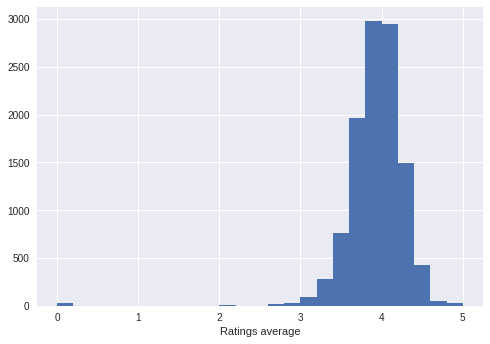

In [ ]:
plt.hist(books['average_rating'], bins=25)
plt.xlabel('Ratings average');

> Observation: ratings from 3.0 to 4.0 are the most

------

# Bivariate
> Make at least one chart
,write your observation under every chart

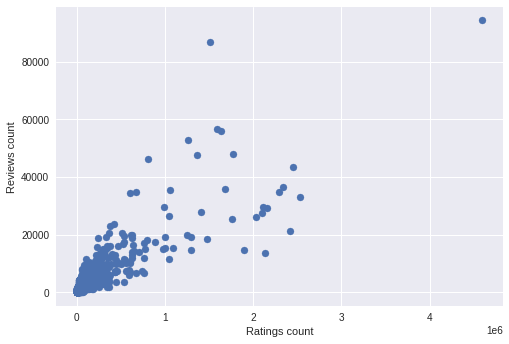

In [ ]:
plt.scatter(books['ratings_count'], books['text_reviews_count'])
plt.xlabel('Ratings count')
plt.ylabel('Reviews count');

> Observation: the relationship is positive correlation

----


# Multivariate
> Make at least one chart
,write your observation under every chart

In [ ]:
# extract year from publication_date
books['publish_year'] = books.publication_date.map(lambda date: int(date.split('/')[2]))
books['publish_year'].head()

0    2006
1    2004
2    2003
3    2004
4    2004
Name: publish_year, dtype: int64

In [ ]:
# get data of top 10 rated authors
top_10_authors = books.sort_values('ratings_count', ascending=False).authors.unique()[:10]
new_df = books[books.authors.isin(top_10_authors)]

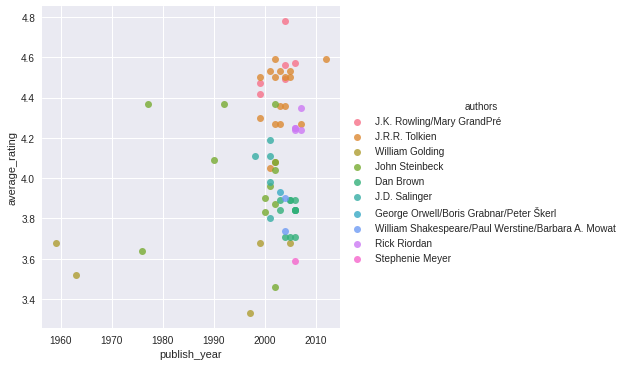

In [ ]:
from seaborn import lmplot
lmplot(data=new_df, x='publish_year', y='average_rating', hue='authors', fit_reg=False);

> This graph describes the relation betwwen publish_year and average_rating for each one of the top 10 book authors
